In [1]:
#Load Libraries
import re
import string
import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim
from tqdm.auto import tqdm
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
import nlpaug.augmenter.word.context_word_embs as aug

#Load Training Data
train = pd.read_csv('C:/Users/danie/Desktop/Capstone/Dataset/dataset5_prep.csv')
display(train)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,description,tags
0,invoice tabratas tharom ismayoeddin,Travelling Expenses
1,print label,Courier & Postage
2,computer usage,Printing. Stationery & Periodicals
3,lavender callons tesco,Staff Welfare
4,hotel badri grabd pink hatyai,Accomodation
...,...,...
102405,pc mbs roadmax ii additional insurance securi...,Motor Vehicle Insurance & Road Tax
102406,pc mbs roadmax additional life insurance fee w...,Motor Vehicle Insurance & Road Tax
102407,data emma jpj provides roadtax ddc add data month,Motor Vehicle Insurance & Road Tax
102408,pc mbs data roadmax additional credit insuranc...,Motor Vehicle Insurance & Road Tax


<AxesSubplot:>

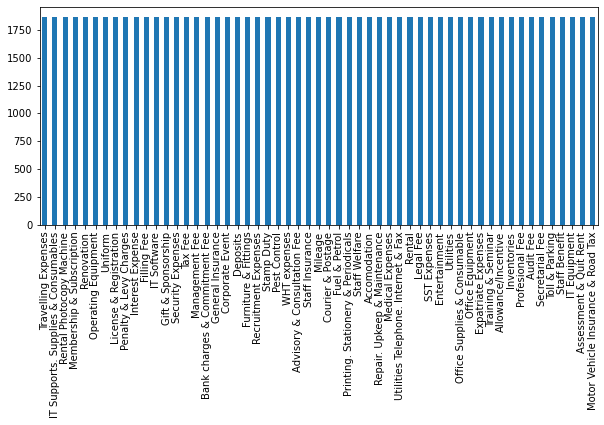

In [2]:
#Class Distribution for Training Set
plt.figure(figsize=(10,4))
train.tags.value_counts().plot(kind='bar')

In [3]:
#Check Class Balance for Training Set
train['tags'].value_counts()

Travelling Expenses                    1862
IT Supports. Supplies & Consumables    1862
Rental Photocopy Machine               1862
Membership & Subscription              1862
Renovation                             1862
Operating Equipment                    1862
Uniform                                1862
License & Registration                 1862
Penalty & Levy Charges                 1862
Interest Expense                       1862
Filling Fee                            1862
IT Software                            1862
Gift & Sponsorship                     1862
Security Expenses                      1862
Tax Fee                                1862
Management Fee                         1862
Bank charges & Commitment Fee          1862
General Insurance                      1862
Corporate Event                        1862
Deposits                               1862
Furniture & Fittings                   1862
Recruitment Expenses                   1862
Stamp Duty                      

In [4]:
#Load Testing Data
test = pd.read_csv('C:/Users/danie/Desktop/Capstone/Dataset/test_set.csv')
display(test)

,description,tags
0,invoice moohamad faizal bin abdul raub,Toll & Parking
1,mileage claim km,Mileage
2,aia aso aso claim excess billing oct d,Medical Expenses
3,uzmalabklccuzmalab mileage,Mileage
4,invoice tabratas tharom ismayoeddin,Utilities
...,...,...
2080,hse team,Utilities Telephone. Internet & Fax
2081,orange nomex iiia fr overall h m size name zaki,Repair. Upkeep & Maintenance
2082,kinabalurigging slinging banksman lvl azmi rol...,Training & Seminar
2083,cos thirdparty professional fee general worker...,Profesional Fee


<AxesSubplot:>

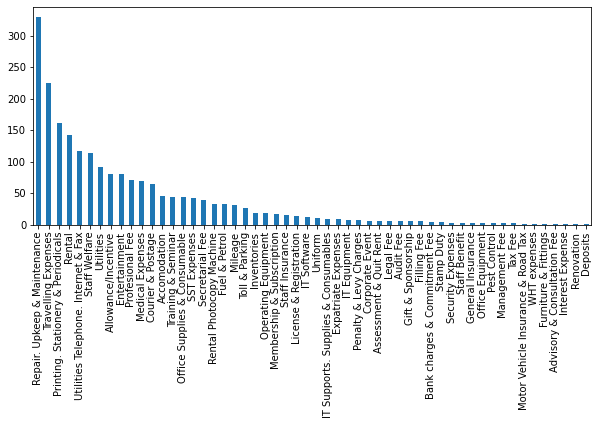

In [5]:
#Class Distribution for Testing Set
plt.figure(figsize=(10,4))
test.tags.value_counts().plot(kind='bar')

In [7]:
#Check Class Balance for Testing Set
test['tags'].value_counts()

Repair. Upkeep & Maintenance           329
Travelling Expenses                    225
Printing. Stationery & Periodicals     161
Rental                                 143
Utilities Telephone. Internet & Fax    117
Staff Welfare                          113
Utilities                               91
Allowance/Incentive                     81
Entertainment                           80
Profesional Fee                         71
Medical Expenses                        69
Courier & Postage                       65
Accomodation                            45
Training & Seminar                      44
Office Supplies & Consumable            44
SST Expenses                            42
Secretarial Fee                         39
Rental Photocopy Machine                32
Fuel & Petrol                           32
Mileage                                 31
Toll & Parking                          27
Inventories                             18
Operating Equipment                     18
Membership 

In [15]:
#Training and Testing Set Assignment
X = train.description
y = train.tags
X_train = train.description
X_test = test.description
y_train = train.tags
y_test = test.description

In [16]:
#NB
kf = StratifiedKFold(n_splits=10)
kf.get_n_splits(X_train)
for train_index, test_index in kf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    vect = CountVectorizer()
    #X_train_dtm = vect.fit_transform(X_train)
    #X_test_dtm = vect.transform(X_test)

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB())
              ])
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

TRAIN: [  1052   1054   1056 ... 102407 102408 102409] TEST: [     0      1      2 ... 100731 100732 100733]
TRAIN: [     0      1      2 ... 102407 102408 102409] TEST: [  1052   1054   1056 ... 100917 100918 100919]
TRAIN: [     0      1      2 ... 102407 102408 102409] TEST: [  2240   2255   2273 ... 101103 101104 101105]
TRAIN: [     0      1      2 ... 102407 102408 102409] TEST: [  3498   3511   3515 ... 101289 101290 101291]
TRAIN: [     0      1      2 ... 102407 102408 102409] TEST: [  4687   4701   4716 ... 101475 101476 101477]
TRAIN: [     0      1      2 ... 102407 102408 102409] TEST: [  5882   5887   5895 ... 101661 101662 101663]
TRAIN: [     0      1      2 ... 102407 102408 102409] TEST: [  7207   7213   7216 ... 101847 101848 101849]
TRAIN: [     0      1      2 ... 102407 102408 102409] TEST: [  8417   8426   8428 ... 102033 102034 102035]
TRAIN: [     0      1      2 ... 102407 102408 102409] TEST: [  9456   9457   9477 ... 102220 102221 102222]
TRAIN: [     0     

In [17]:
#SGD
kf = StratifiedKFold(n_splits=10)
kf.get_n_splits(X_train)
for train_index, test_index in kf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    vect = CountVectorizer()
    #X_train_dtm = vect.fit_transform(X_train)
    #X_test_dtm = vect.transform(X_test)

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

TRAIN: [  1052   1054   1056 ... 102407 102408 102409] TEST: [     0      1      2 ... 100731 100732 100733]
TRAIN: [     0      1      2 ... 102407 102408 102409] TEST: [  1052   1054   1056 ... 100917 100918 100919]
TRAIN: [     0      1      2 ... 102407 102408 102409] TEST: [  2240   2255   2273 ... 101103 101104 101105]
TRAIN: [     0      1      2 ... 102407 102408 102409] TEST: [  3498   3511   3515 ... 101289 101290 101291]
TRAIN: [     0      1      2 ... 102407 102408 102409] TEST: [  4687   4701   4716 ... 101475 101476 101477]
TRAIN: [     0      1      2 ... 102407 102408 102409] TEST: [  5882   5887   5895 ... 101661 101662 101663]
TRAIN: [     0      1      2 ... 102407 102408 102409] TEST: [  7207   7213   7216 ... 101847 101848 101849]
TRAIN: [     0      1      2 ... 102407 102408 102409] TEST: [  8417   8426   8428 ... 102033 102034 102035]
TRAIN: [     0      1      2 ... 102407 102408 102409] TEST: [  9456   9457   9477 ... 102220 102221 102222]
TRAIN: [     0     

In [18]:
#LGR
kf = StratifiedKFold(n_splits=10)
kf.get_n_splits(X_train)
for train_index, test_index in kf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    vect = CountVectorizer()
    #X_train_dtm = vect.fit_transform(X_train)
    #X_test_dtm = vect.transform(X_test)

logreg = Pipeline([('vect', CountVectorizer()),
                   ('tfidf', TfidfTransformer()),
                   ('clf', LogisticRegression(n_jobs=1, C=1e5)),
                 ])
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

TRAIN: [  1052   1054   1056 ... 102407 102408 102409] TEST: [     0      1      2 ... 100731 100732 100733]
TRAIN: [     0      1      2 ... 102407 102408 102409] TEST: [  1052   1054   1056 ... 100917 100918 100919]
TRAIN: [     0      1      2 ... 102407 102408 102409] TEST: [  2240   2255   2273 ... 101103 101104 101105]
TRAIN: [     0      1      2 ... 102407 102408 102409] TEST: [  3498   3511   3515 ... 101289 101290 101291]
TRAIN: [     0      1      2 ... 102407 102408 102409] TEST: [  4687   4701   4716 ... 101475 101476 101477]
TRAIN: [     0      1      2 ... 102407 102408 102409] TEST: [  5882   5887   5895 ... 101661 101662 101663]
TRAIN: [     0      1      2 ... 102407 102408 102409] TEST: [  7207   7213   7216 ... 101847 101848 101849]
TRAIN: [     0      1      2 ... 102407 102408 102409] TEST: [  8417   8426   8428 ... 102033 102034 102035]
TRAIN: [     0      1      2 ... 102407 102408 102409] TEST: [  9456   9457   9477 ... 102220 102221 102222]
TRAIN: [     0     

C:\Users\danie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy 0.9447319597695537
                                     precision    recall  f1-score   support

                       Accomodation       0.83      0.88      0.86       187
        Advisory & Consultation Fee       0.99      0.99      0.99       186
                Allowance/Incentive       0.88      0.87      0.87       186
             Assessment & Quit Rent       1.00      1.00      1.00       186
                          Audit Fee       0.87      0.99      0.93       186
      Bank charges & Commitment Fee       0.83      0.79      0.81       187
                    Corporate Event       0.98      0.98      0.98       186
                  Courier & Postage       0.91      0.96      0.93       186
                           Deposits       0.98      0.99      0.99       186
                      Entertainment       0.90      0.88      0.89       186
                Expatriate Expenses       0.96      0.99      0.97       186
                        Filling Fee       0.99 

In [8]:
#LSVC
kf = StratifiedKFold(n_splits=10)
kf.get_n_splits(X_train)
for train_index, test_index in kf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    vect = CountVectorizer()
    #X_train_dtm = vect.fit_transform(X_train)
    #X_test_dtm = vect.transform(X_test)

SVC = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LinearSVC()),
               ])
SVC.fit(X_train, y_train)

y_pred = SVC.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

TRAIN: [  1052   1054   1056 ... 102407 102408 102409] TEST: [     0      1      2 ... 100731 100732 100733]
TRAIN: [     0      1      2 ... 102407 102408 102409] TEST: [  1052   1054   1056 ... 100917 100918 100919]
TRAIN: [     0      1      2 ... 102407 102408 102409] TEST: [  2240   2255   2273 ... 101103 101104 101105]
TRAIN: [     0      1      2 ... 102407 102408 102409] TEST: [  3498   3511   3515 ... 101289 101290 101291]
TRAIN: [     0      1      2 ... 102407 102408 102409] TEST: [  4687   4701   4716 ... 101475 101476 101477]
TRAIN: [     0      1      2 ... 102407 102408 102409] TEST: [  5882   5887   5895 ... 101661 101662 101663]
TRAIN: [     0      1      2 ... 102407 102408 102409] TEST: [  7207   7213   7216 ... 101847 101848 101849]
TRAIN: [     0      1      2 ... 102407 102408 102409] TEST: [  8417   8426   8428 ... 102033 102034 102035]
TRAIN: [     0      1      2 ... 102407 102408 102409] TEST: [  9456   9457   9477 ... 102220 102221 102222]
TRAIN: [     0     

In [9]:
#RF
kf = StratifiedKFold(n_splits=10)
kf.get_n_splits(X_train)
for train_index, test_index in kf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    vect = CountVectorizer()
    #X_train_dtm = vect.fit_transform(X_train)
    #X_test_dtm = vect.transform(X_test)

RF = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', RandomForestClassifier()),
              ])

RF.fit(X_train, y_train)

y_pred = RF.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

TRAIN: [  1052   1054   1056 ... 102407 102408 102409] TEST: [     0      1      2 ... 100731 100732 100733]
TRAIN: [     0      1      2 ... 102407 102408 102409] TEST: [  1052   1054   1056 ... 100917 100918 100919]
TRAIN: [     0      1      2 ... 102407 102408 102409] TEST: [  2240   2255   2273 ... 101103 101104 101105]
TRAIN: [     0      1      2 ... 102407 102408 102409] TEST: [  3498   3511   3515 ... 101289 101290 101291]
TRAIN: [     0      1      2 ... 102407 102408 102409] TEST: [  4687   4701   4716 ... 101475 101476 101477]
TRAIN: [     0      1      2 ... 102407 102408 102409] TEST: [  5882   5887   5895 ... 101661 101662 101663]
TRAIN: [     0      1      2 ... 102407 102408 102409] TEST: [  7207   7213   7216 ... 101847 101848 101849]
TRAIN: [     0      1      2 ... 102407 102408 102409] TEST: [  8417   8426   8428 ... 102033 102034 102035]
TRAIN: [     0      1      2 ... 102407 102408 102409] TEST: [  9456   9457   9477 ... 102220 102221 102222]
TRAIN: [     0     